In [121]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [122]:
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('AirQualityUCI(1).csv')
class_name = 'weekend'
df.head()

Saving AirQualityUCI(1).csv to AirQualityUCI(1) (3).csv


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [123]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis= 1, inplace = True)

In [124]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [125]:
df.shape

(9471, 15)

In [126]:
df.dropna(how = 'all',inplace = True)

In [127]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [128]:
b = pd.DataFrame(df.Date)
b['Date'] = pd.to_datetime(b['Date'])

b['day_of_week'] = b['Date'].dt.day_name()

In [129]:


df['weekday'] = b['day_of_week']



In [130]:
tf = []
for i in df.weekday:
    if i == 'Sunday' or i == 'Saturday':
        tf.append(1)
    else:
        tf.append(0)

In [131]:


df['weekend'] = tf



In [132]:
df.drop(columns=['weekday','AH','NMHC(GT)'],axis = 1,inplace=True)

In [133]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,weekend
0,3/10/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0
1,3/10/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0
2,3/10/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0
3,3/10/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0
4,3/10/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0


In [134]:
df['PT08_feat'] = ( df['PT08.S2(NMHC)'] + df['PT08.S1(CO)'] + df['PT08.S4(NO2)'] + df['PT08.S5(O3)']) / 4

In [135]:


df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)'],axis=1,inplace=True)



In [136]:
df.loc[df.PT08_feat < 0, 'PT08_feat'] = df.PT08_feat.mean()
df.loc[df['CO(GT)'] < 0, 'CO(GT)'] = df['CO(GT)'].mean()
df.loc[df['RH'] < 0, 'RH'] = df['RH'].mean()
df.loc[df['C6H6(GT)'] < -50, 'C6H6(GT)'] = df['C6H6(GT)'].mean()
df.loc[df['PT08.S3(NOx)'] < 0, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
df.loc[df['NO2(GT)'] < -50, 'NO2(GT)'] = df['NO2(GT)'].mean()
df.loc[df['T'] < -50, 'T'] = df['T'].mean()

In [137]:
df.head()

,Date,Time,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat
0,3/10/2004,18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,0,1341.50
1,3/10/2004,19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,0,1194.50
2,3/10/2004,20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,0,1242.25
3,3/10/2004,21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,0,1277.75
4,3/10/2004,22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,0,1177.00


In [138]:
df.to_csv('air_datasat_time.csv')

# Time series

In [139]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


In [140]:
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

In [141]:
df.drop(columns=['Date','Time'],axis = 1,inplace=True)

In [142]:


df.set_index(df.Datetime, inplace = True)



In [143]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat,Datetime
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,0,1341.50,2004-03-10 18:00:00
2004-03-10 19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,0,1194.50,2004-03-10 19:00:00
2004-03-10 20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,0,1242.25,2004-03-10 20:00:00
2004-03-10 21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,0,1277.75,2004-03-10 21:00:00
2004-03-10 22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,0,1177.00,2004-03-10 22:00:00


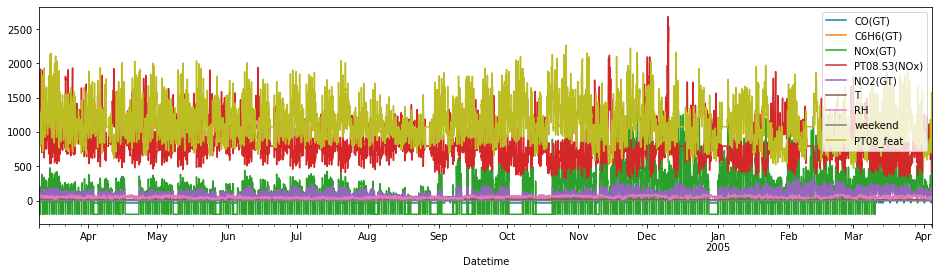

In [144]:
df.set_index("Datetime").plot()

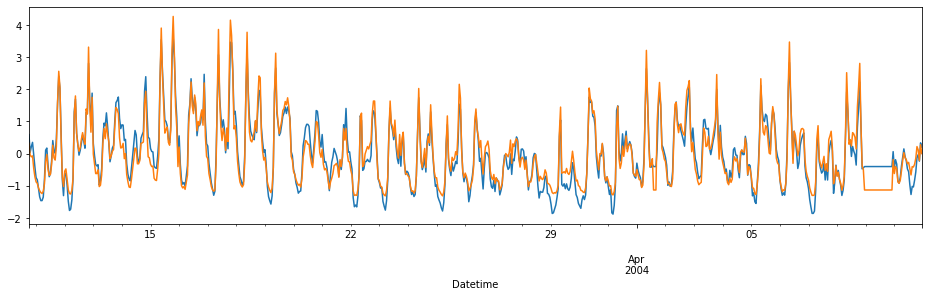

In [145]:
ts3 = df['PT08_feat'].loc["2004-03-10" : "2004-04-10"]
ts4 = df['C6H6(GT)'].loc["2004-03-10" : "2004-04-10"]

ts3 = (ts3-ts3.mean())/ts3.std()
ts4 = (ts4 - ts4.mean())/ts4.std()

ts3.plot()
ts4.plot()

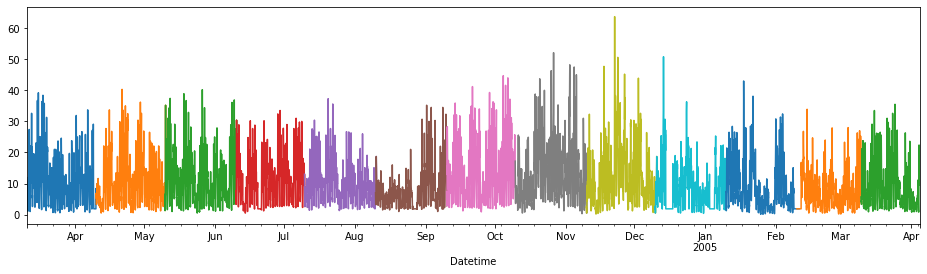

In [146]:
ts = df['C6H6(GT)'].loc["2004-03-10" : "2004-04-10"]
ts1 = df['C6H6(GT)'].loc["2004-04-10" : "2004-05-10"]
ts2 = df['C6H6(GT)'].loc["2004-05-10" : "2004-06-10"]
ts3 = df['C6H6(GT)'].loc["2004-06-10" : "2004-07-10"]
ts4 = df['C6H6(GT)'].loc["2004-07-10" : "2004-08-10"]
ts5 = df['C6H6(GT)'].loc["2004-08-10" : "2004-09-10"]
ts6 = df['C6H6(GT)'].loc["2004-09-10" : "2004-10-10"]
ts7 = df['C6H6(GT)'].loc["2004-10-10" : "2004-11-10"]
ts8 = df['C6H6(GT)'].loc["2004-11-10" : "2004-12-10"]
ts9 = df['C6H6(GT)'].loc["2004-12-10" : "2005-01-10"]
ts10 = df['C6H6(GT)'].loc["2005-01-10" : "2005-02-10"]
ts11 = df['C6H6(GT)'].loc["2005-02-10" : "2005-03-10"]
ts12 = df['C6H6(GT)'].loc["2005-03-10" : "2005-04-10"]

ts.plot()
ts1.plot()
ts2.plot()
ts3.plot()
ts4.plot()
ts5.plot()
ts6.plot()
ts7.plot()
ts8.plot()
ts9.plot()
ts10.plot()
ts11.plot()
ts12.plot()

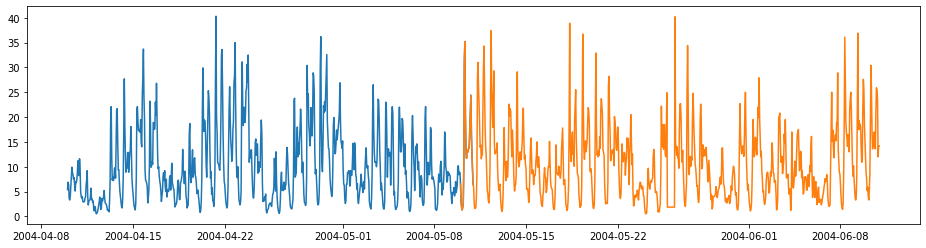

In [147]:
plt.plot(ts1)
plt.plot(ts2)
plt.show()

In [148]:
df_marzo1 = pd.DataFrame(data = {'marzo1':ts})
df_aprile = pd.DataFrame(data = {'aprile':ts1})
df_maggio = pd.DataFrame(data = {'maggio':ts2})
df_giugno = pd.DataFrame(data = {'giugno':ts3})
df_luglio = pd.DataFrame(data = {'luglio':ts4})
df_agosto = pd.DataFrame(data = {'agosto':ts5})
df_settembre = pd.DataFrame(data = {'settembre':ts6})
df_ottobre = pd.DataFrame(data = {'ottobre':ts7})
df_novembre = pd.DataFrame(data = {'novembre':ts8})
df_dicembre = pd.DataFrame(data = {'dicembre':ts9})
df_gennaio = pd.DataFrame(data = {'gennaio':ts10})
df_febbraio = pd.DataFrame(data = {'febbraio':ts11})
df_marzo2 = pd.DataFrame(data = {'marzo2':ts12})


df_marzo1.reset_index(inplace= True)
df_aprile.reset_index(inplace= True)
df_maggio.reset_index(inplace= True)
df_giugno.reset_index(inplace= True)
df_luglio.reset_index(inplace= True)
df_agosto.reset_index(inplace= True)
df_settembre.reset_index(inplace= True)
df_ottobre.reset_index(inplace= True)
df_novembre.reset_index(inplace= True)
df_dicembre.reset_index(inplace= True)
df_gennaio.reset_index(inplace= True)
df_febbraio.reset_index(inplace= True)
df_marzo2.reset_index(inplace= True)

ts_marzo1 = pd.Series(df_marzo1.marzo1)
ts_aprile = pd.Series(df_aprile.aprile)
ts_maggio = pd.Series(df_maggio.maggio)
ts_giugno = pd.Series(df_giugno.giugno)
ts_luglio = pd.Series(df_luglio.luglio)
ts_agosto = pd.Series(df_agosto.agosto)
ts_settembre = pd.Series(df_settembre.settembre)
ts_ottobre = pd.Series(df_ottobre.ottobre)
ts_novembre = pd.Series(df_novembre.novembre)
ts_dicembre = pd.Series(df_dicembre.dicembre)
ts_gennaio = pd.Series(df_gennaio.gennaio)
ts_febbraio = pd.Series(df_febbraio.febbraio)
ts_marzo2 = pd.Series(df_marzo2.marzo2)

# Plotting two months

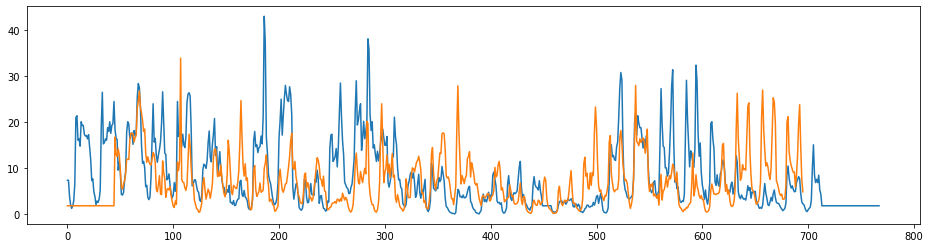

In [149]:
plt.plot(ts_gennaio)
plt.plot(ts_febbraio)
plt.show()

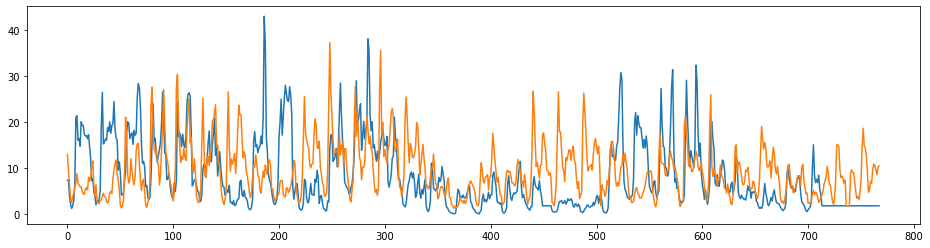

In [153]:
plt.plot(ts_gennaio)
plt.plot(ts_luglio)
plt.show()

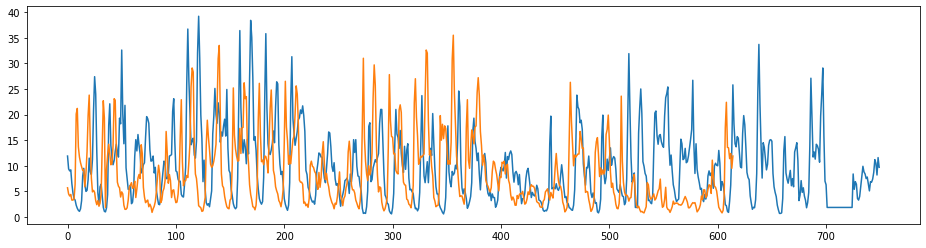

In [151]:
plt.plot(ts_marzo1)
plt.plot(ts_marzo2)
plt.show()

# Transformations

### Transformation I: Offset Translation

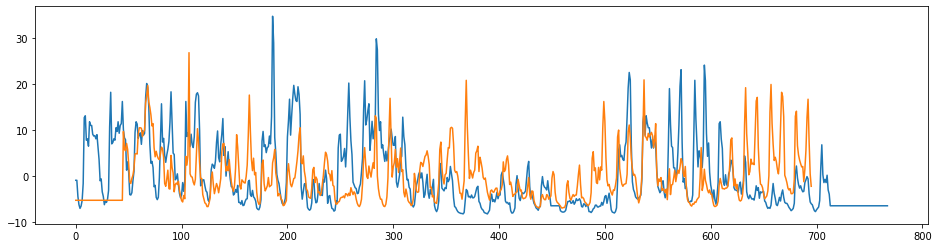

In [152]:
plt.plot(ts_gennaio - ts_gennaio.mean())
plt.plot(ts_febbraio - ts_febbraio.mean())
plt.show()

# Transformation II: Amplitude Scaling

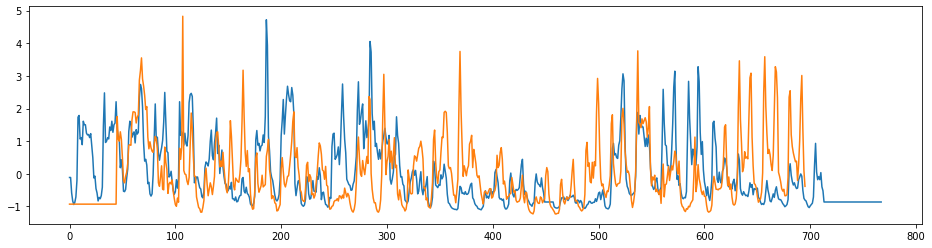

In [154]:
plt.plot((ts_gennaio - ts_gennaio.mean())/ts_gennaio.std())
plt.plot((ts_febbraio - ts_febbraio.mean())/ts_febbraio.std())
plt.show()

In [160]:
!python -m pip install tslearn

     |████████████████████████████████| 778kB 3.6MB/s 


In [161]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [163]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1,)  # Rescale time series
ts_gennaio_scaled = scaler.fit_transform(ts_gennaio).flatten()
ts_febbraio_scaled = scaler.fit_transform(ts_febbraio).flatten()

plt.plot(ts_gennaio_scaled)
plt.plot(ts_febbraio_scaled)
plt.show()

ValueError: ignored

## Transformation IV: Noise (smoothing)

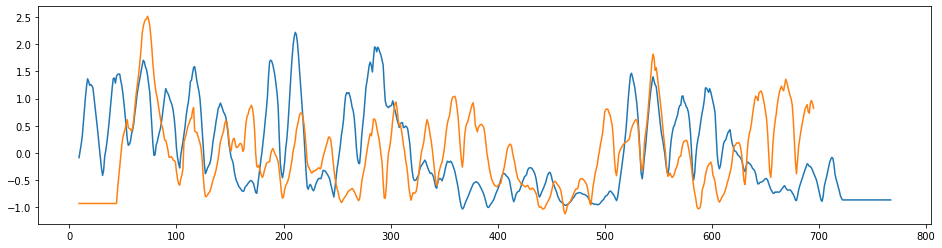

In [165]:
w = 10
plt.plot(((ts_gennaio - ts_gennaio.mean())/ts_gennaio.std()).rolling(window=w).mean())
plt.plot(((ts_febbraio - ts_febbraio.mean())/ts_febbraio.std()).rolling(window=w).mean())
plt.show()

## Transformation III: Trend removal

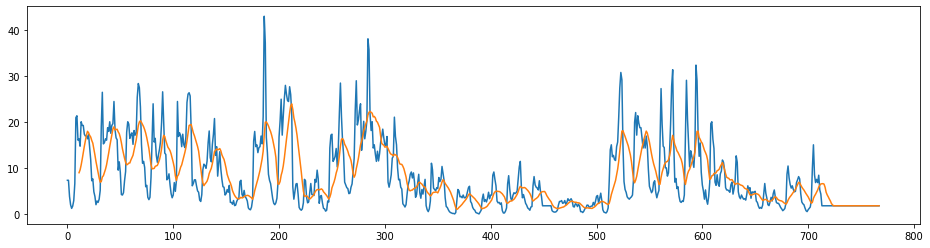

In [166]:
plt.plot(ts_gennaio)
plt.plot(ts_gennaio.rolling(window=12).mean())
plt.show()

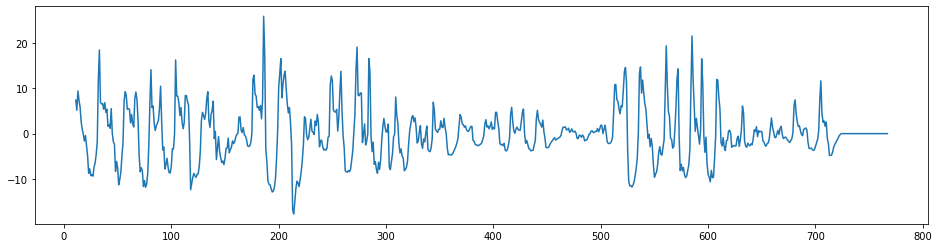

In [167]:
ts_gennaio_shift = ts_gennaio - ts_gennaio.rolling(window=12).mean()
plt.plot(ts_gennaio_shift)
plt.show()